In [55]:
N = [300,300]
Δx = 0.01
xmin = [0.0,0.0]

2-element Array{Float64,1}:
 0.0
 0.0

In [50]:
include(joinpath(Pkg.dir("whirl2d"), "src/Whirl2d.jl"))
import Whirl2d
import Whirl2d:@get
using PyPlot
@get Whirl2d (Grids, DualPatch)

Whirl2d.Grids.DualPatch

In [56]:
g = DualPatch(N,Δx,xmin)

Grid: number of cells = (300,300), Δx = 0.01, xmin = (0.0, 0.0), xmax = (3.0,3.0)


In [57]:
# this creates a table of the upper right quadrant of the lattice Green's function
# suitable for discrete convolution
@time GL = Grids.lgf(g);

  1.570847 seconds (1.50 M allocations: 1.322 GiB, 4.66% gc time)


In [5]:
# this ceates a table of the integrating factor, but is specific to the choice of α
α = 10.0;
GE = Grids.intfact(g,α);

In [6]:
# this ceates a table of the inverse of the integrating factor, again specific to the choice of α
α = 1.0;
GEinv = Grids.intfact(g,-α);

In [58]:
# Create a "grid unit vector": a bunch of cell data with zeros everywhere except at one point.
# This is useful for visualizing the LGF and the integrating factor
wunit = zeros(g.w);
wunit[10,10] = 1.0;

In [9]:
# This is the discrete convolution of the integrating factor with the grid unit vector
# The result is just the integrating factor field, but shifted to the center specified
# in the grid unit vector.
s = Grids.gridconvolve(wunit,GE);

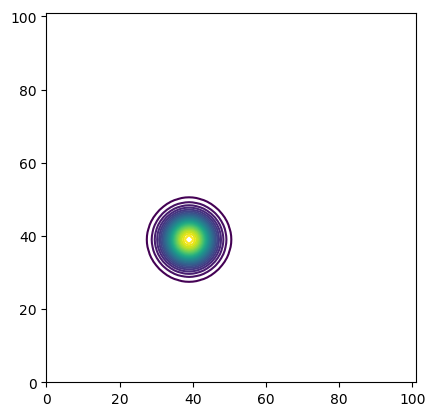

(0.0, 101.0, 0.0, 101.0)

In [10]:
# plot this
contour(s,31)
axis("scaled")

In [20]:
# This is the discrete convolution of the inverse of the integrating factor with the grid unit vector
s = Grids.gridconvolve(wunit,GEinv);

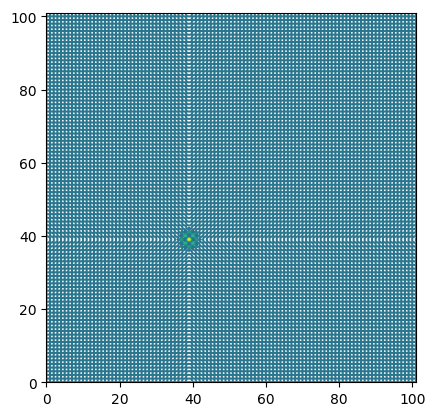

(0.0, 101.0, 0.0, 101.0)

In [21]:
# plot this
contour(s,31)
axis("scaled")

In [59]:
# This is the discrete convolution of the LGF with the grid unit vector
@time s = Grids.gridconvolve(wunit,GL);

 26.665352 seconds (6 allocations: 712.797 KiB)


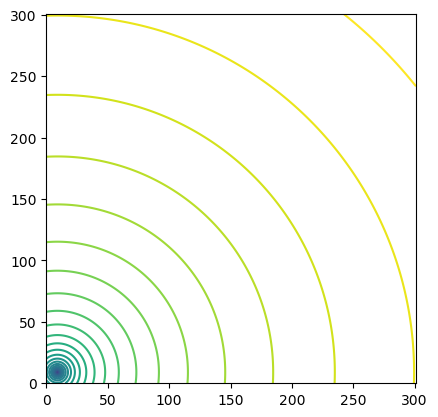

(0.0, 301.0, 0.0, 301.0)

In [60]:
# plot this
contour(s,31)
axis("scaled")

In [47]:
Grids.lgf([158,1])

1.0630831072819231

In [42]:
Grids.lgf([2,153])

1.0456202628090936